## Banco de dados: Passageiros

In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
dados = pd.read_csv(uri, sep=',')
dados

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


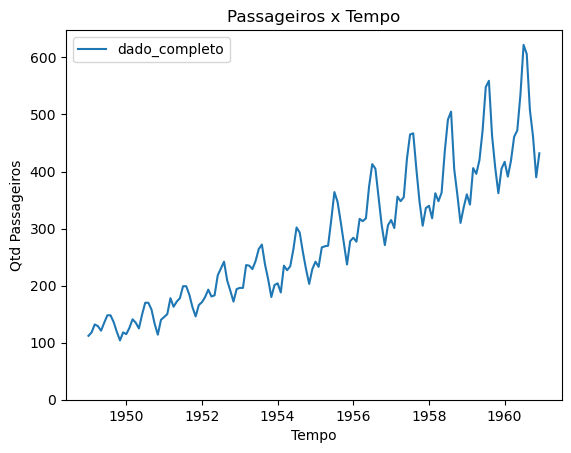

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='tempo', y='passageiros', data=dados, label='dado_completo')
plt.xlabel('Tempo', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Qtd Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(dados)
dados_escalados = sc.transform(dados)
dados_escalados

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546],
       [-1.47949574, -1.47469699],
       [-1.4554389 , -1.35759023],
       [-1.43138206, -1.38268454],
       [-1.40732522, -1.29067209],
       [-1.38326837, -1.16520057],
       [-1.35921153, -1.21538918],
       [-1.33515469, -1.29903686],
       [-1.31109785, -1.09828242],
       [-1.28704101, -0.9226223 ],
       [-1.26298417, -0.9226223 ],
       [-1.23892733, -1.02299951],
       [-1.21487049, -1.23211871],
       [-1.19081364, -1.3910493 ],
       [-1.1667568 , -1.17356534],
       [-1.14269996, -1.1317415 ],
       [-1.11864312, -1.08991766],
       [-1.09458628, -0.85570415],
       [-1.07052944, -0.98117567],
       [-1.0464726 ,

In [17]:
x = dados_escalados[:,0]
y = dados_escalados[:,1]

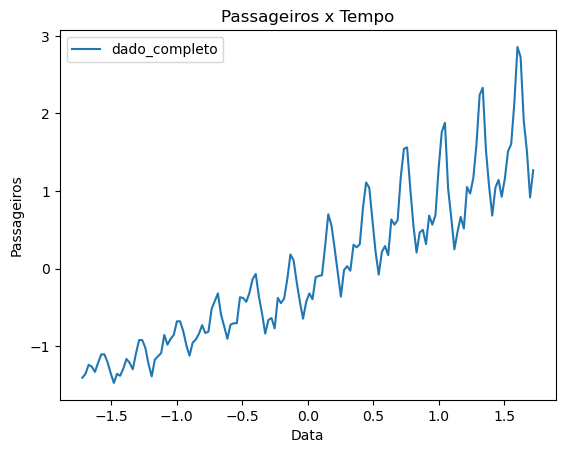

In [29]:
sns.lineplot(x=x, y=y,  label='dado_completo')
plt.xlabel('Data', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
#plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

In [23]:
tamanho_treino = int(len(dados)*0.9)
tamanho_teste = len(dados) - tamanho_treino

In [26]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(dados)]
yteste = y[tamanho_treino:len(dados)]

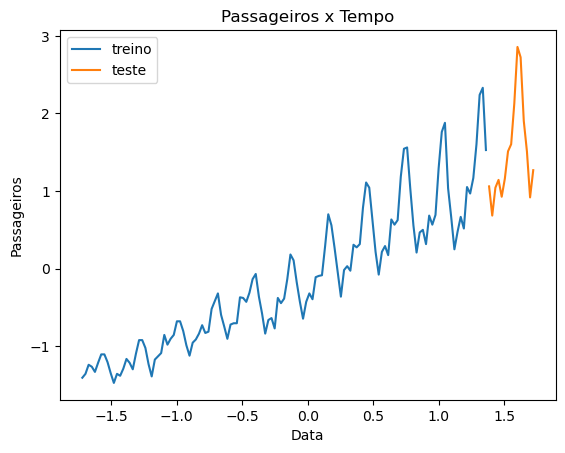

In [28]:
sns.lineplot(x=xtreino, y=ytreino,  label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.xlabel('Data', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
#plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


regressor = Sequential()
regressor.add(Dense(1, input_dim = 1, kernel_initializer = 'ones', activation = 'linear', use_bias = False))
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [38]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 3ms/step - loss: 0.1285


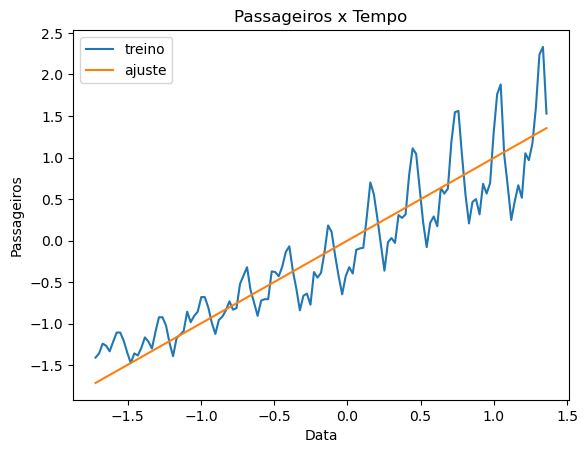

In [39]:
y_predict = regressor.predict(xtreino)

sns.lineplot(x=xtreino, y=ytreino,  label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste')
plt.xlabel('Data', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
#plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

In [40]:
d = {'tempo': xtreino, 'passageiros' : y_predict[:,0]}
resultados = pd.DataFrame(data = d)
resultados

,tempo,passageiros
0,-1.720064,-1.713125
1,-1.696007,-1.689166
2,-1.671950,-1.665206
3,-1.647894,-1.641246
4,-1.623837,-1.617286
...,...,...
124,1.262984,1.257889
125,1.287041,1.281849
126,1.311098,1.305809
127,1.335155,1.329769


In [43]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(data = resultado_transf, columns = ['tempo', 'passageiros' ])
resultado_transf

,tempo,passageiros
0,1949.000000,75.496118
1,1949.083333,78.360484
2,1949.166667,81.224864
3,1949.250000,84.089230
4,1949.333333,86.953610
...,...,...
124,1959.333333,430.678068
125,1959.416667,433.542448
126,1959.500000,436.406799
127,1959.583333,439.271165


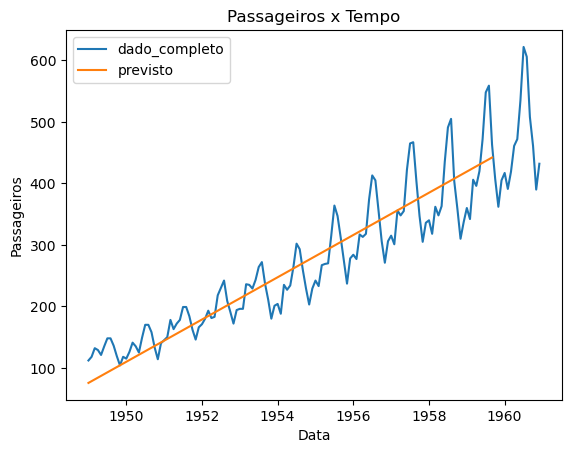

In [44]:
sns.lineplot(x='tempo', y='passageiros', data = dados,  label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf,  label='previsto')
plt.xlabel('Data', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
#plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

In [45]:
y_predict_teste = regressor.predict(xteste)
d= {'tempo': xteste, 'passageiros' : y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data = d)
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_transf_teste = pd.DataFrame(data = resultado_transf_teste, columns = ['tempo', 'passageiros' ])
resultado_transf_teste

,tempo,passageiros
0,1959.750000,444.999911
1,1959.833333,447.864291
2,1959.916667,450.728657
3,1960.000000,453.593023
4,1960.083333,456.457403
5,1960.166667,459.321769
6,1960.250000,462.186149
7,1960.333333,465.050515
8,1960.416667,467.914881
9,1960.500000,470.779247


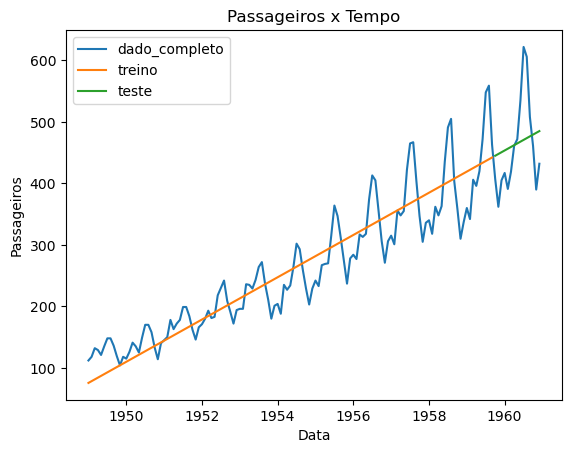

In [47]:
sns.lineplot(x='tempo', y='passageiros', data = dados,  label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf,  label='treino')
sns.lineplot(x='tempo', y='passageiros', data = resultado_transf_teste,  label='teste')
plt.xlabel('Data', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
#plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

In [48]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim = 1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))
regressor2.add(Dense(8, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))
regressor2.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [49]:
regressor2.fit(xtreino, ytreino, epochs = 200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 0.8102
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8097
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8093
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8089
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8082
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8072
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8055
Epoch 8/200
5/5 [==============================] - 0s 7ms/step - loss: 0.8031
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7999
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7955
Epoch 11/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7891
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7813
Epoch 13/200
5/5 [==============================] - 0s 5ms/st

In [50]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

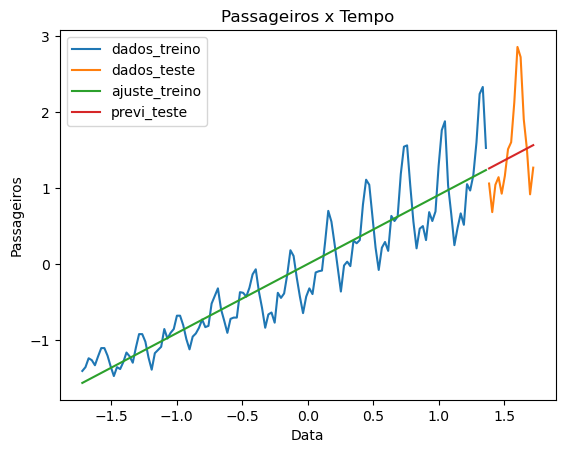

In [55]:
sns.lineplot(x=xtreino, y=ytreino,  label='dados_treino')
sns.lineplot(x=xteste, y=yteste,  label='dados_teste')
sns.lineplot(x=xtreino, y=y_predict[:,0],  label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0],  label='previ_teste')
plt.xlabel('Data', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
#plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

In [57]:
import numpy as np

vetor = pd.DataFrame(ytreino)[0]

def separa_dados(vetor,n_passos):
    x_novo, y_novo = [], []

    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i - n_passos : i - 1]))
        y_novo.append(vetor.loc[i])
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo

In [59]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [61]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [70]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [66]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim = 1, kernel_initializer = 'ones', activation = 'linear', use_bias = False))
regressor3.add(Dense(64, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False))
regressor3.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))

regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')

regressor3.fit(xtreino_novo, ytreino_novo, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8037
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7606
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7356
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7197
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6996
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6758
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6517
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6289
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5987
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5705
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5380
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5016
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

<AxesSubplot:xlabel='tempo', ylabel='0'>

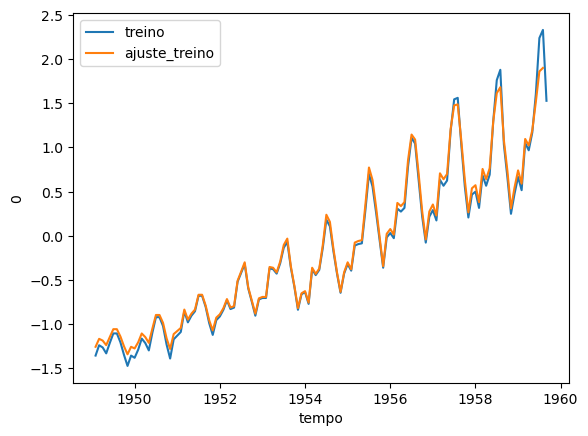

In [67]:
y_predict_novo = regressor3.predict(xtreino_novo)

sns.lineplot(x = 'tempo', y = ytreino_novo, data = dados[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = dados[1:129], label = 'ajuste_treino')

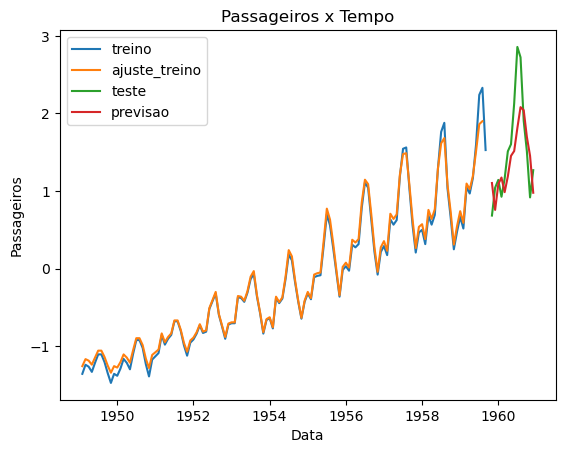

In [74]:
y_predict_teste_novo = regressor3.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x = 'tempo', y = ytreino_novo, data = dados[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = dados[1:129], label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y = yteste_novo, data = dados[130:144], label = 'teste')
sns.lineplot(x = 'tempo', y =resultado.values, data = dados[130:144], label = 'previsao')
plt.xlabel('Data', loc='center')
#plt.xlim(1952) inicio e fim do plot
plt.ylabel('Passageiros', loc='center') #loc{'bottom', 'center', 'top'}
#plt.ylim(0)
plt.title('Passageiros x Tempo')
plt.show()

## Banco de dados: Bicicletas

In [75]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
bicicletas = pd.read_csv(uri, sep=',')
bicicletas

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [76]:
bicicletas['datas'] = pd.to_datetime(bicicletas['datas'])
bicicletas

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

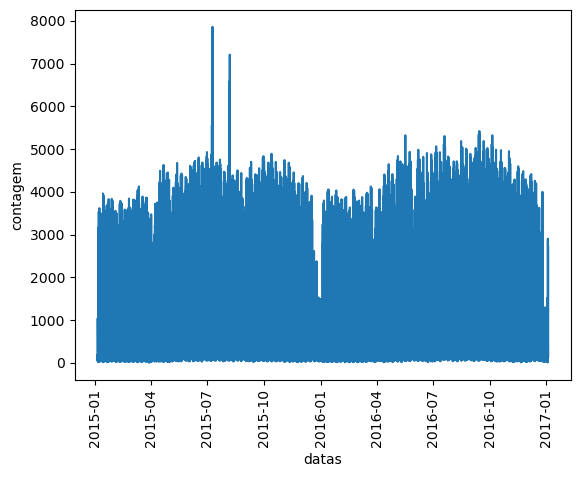

In [78]:
sns.lineplot(x = 'datas', y = 'contagem', data = bicicletas)
plt.xticks(rotation = 90)

In [79]:
sc2 = StandardScaler()

sc2.fit(bicicletas['contagem'].values.reshape(-1,1))
y = sc2.transform(bicicletas['contagem'].values.reshape(-1,1))
tamanho_treino = int(len(bicicletas) * 0.9)
tamanho_teste = len(bicicletas) - tamanho_treino

ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bicicletas)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

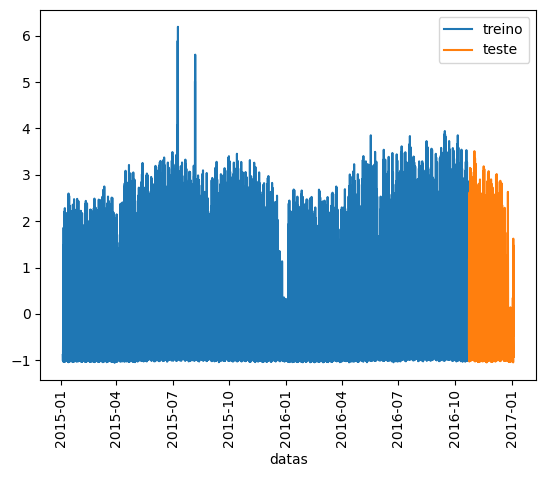

In [81]:
sns.lineplot(x = 'datas', y = ytreino[:,0], data = bicicletas[0:tamanho_treino], label = 'treino')
sns.lineplot(x = 'datas', y = yteste[:,0], data = bicicletas[tamanho_treino:len(bicicletas)], label = 'teste')
plt.xticks(rotation = 90)

In [83]:
vetor = pd.DataFrame(ytreino)[0]

x_treino_novo, y_treino_novo = separa_dados(vetor, 10)
y_treino_novo[0:10]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941,
       -0.25261034, -0.3742607 , -0.50604859, -0.57240333, -0.70419123])

In [84]:
vetor2 = pd.DataFrame(yteste)[0]

x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)
y_teste_novo[0:10]

array([ 0.21463765, -0.22957049, -0.48669512, -0.62769895, -0.61018867,
       -0.77423235, -0.86731331, -0.92813849, -0.99633642, -1.02582741])

In [85]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1))

In [ ]:
from tensorflow.keras.layers import LSTM

recorrente = Sequential()

recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

In [ ]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

In [ ]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [ ]:
y_predito = recorrente.predict(xteste_novo)

In [ ]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

In [ ]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

In [ ]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [ ]:
print(resultado2.history.keys())

In [ ]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
